In [44]:
import pandas as pd
import numpy as np

In [45]:
df=pd.read_csv(r'clean_crime_data.csv', low_memory=False)
df.head()

,CrimeDateTime,Description,Inside_Outside,Weapon,Gender,Age,Race,Old_District,Neighborhood,Latitude,...,PremiseType,Total_Incidents,Year,Month,day_of_month,day_of_year,week_of_year,dayname_of_week,day_of_week,Hour
0,2023-04-15 11:30:00+00:00,LARCENY,Inside,UNKNOWN,Female,56,WHITE,NORTHERN,HARWOOD,39.318181,...,STREET,1,2023,4,15,105,15,Saturday,5,11
1,2023-04-15 21:50:00+00:00,LARCENY,Inside,UNKNOWN,UNKNOWN,38,UNKNOWN,NORTHEAST,PULASKI INDUSTRIAL AREA,39.310944,...,GAS STATION,1,2023,4,15,105,15,Saturday,5,21
2,2023-04-15 17:00:00+00:00,LARCENY FROM AUTO,Inside,UNKNOWN,Male,56,BLACK_OR_AFRICAN_AMERICAN,SOUTHWEST,MOUNT HOLLY,39.313038,...,STREET,1,2023,4,15,105,15,Saturday,5,17
3,2023-04-15 21:15:00+00:00,ROBBERY,Inside,HANDGUN,Male,54,WHITE,NORTHWEST,CENTRAL PARK HEIGHTS,39.337523,...,STREET,1,2023,4,15,105,15,Saturday,5,21
4,2023-04-11 09:25:00+00:00,COMMON ASSAULT,Outside,PERSONAL_WEAPONS,Male,58,WHITE,WESTERN,MOSHER,39.296418,...,DRUG STORE / MED BL,1,2023,4,11,101,15,Tuesday,1,9


In [46]:
df.isnull().sum()

CrimeDateTime      0
Description        0
Inside_Outside     0
Weapon             0
Gender             0
Age                0
Race               0
Old_District       0
Neighborhood       0
Latitude           0
Longitude          0
PremiseType        0
Total_Incidents    0
Year               0
Month              0
day_of_month       0
day_of_year        0
week_of_year       0
dayname_of_week    0
day_of_week        0
Hour               0
dtype: int64

In [47]:
df['new_desc'] = df['Description']

In [48]:
df.loc[df['new_desc'].isin(['ROBBERY - COMMERCIAL', 'ROBBERY - CARJACKING' ]), 'new_desc'] = 'ROBBERY'
df.loc[df['new_desc'].isin(['LARCENY FROM AUTO']), 'new_desc'] = 'LARCENY'
df.loc[df['new_desc'].isin(['COMMON ASSAULT', 'AGG. ASSAULT']), 'new_desc'] = 'ASSUALT'

In [49]:
df.new_desc.value_counts()

new_desc
LARCENY       151225
ASSUALT       134587
BURGLARY       59699
AUTO THEFT     47542
ROBBERY        46648
SHOOTING        6603
HOMICIDE        3373
RAPE            2729
ARSON           1887
Name: count, dtype: int64

In [50]:
def crime_category(crime):
    if crime in ['ASSUALT', 'SHOOTING', 'RAPE', 'HOMICIDE']:
        return 1
    else:
        return 0


df['violent_crime'] = df['new_desc'].apply(crime_category)
df['violent_crime']=df['violent_crime'].astype(int)
df.head()

,CrimeDateTime,Description,Inside_Outside,Weapon,Gender,Age,Race,Old_District,Neighborhood,Latitude,...,Year,Month,day_of_month,day_of_year,week_of_year,dayname_of_week,day_of_week,Hour,new_desc,violent_crime
0,2023-04-15 11:30:00+00:00,LARCENY,Inside,UNKNOWN,Female,56,WHITE,NORTHERN,HARWOOD,39.318181,...,2023,4,15,105,15,Saturday,5,11,LARCENY,0
1,2023-04-15 21:50:00+00:00,LARCENY,Inside,UNKNOWN,UNKNOWN,38,UNKNOWN,NORTHEAST,PULASKI INDUSTRIAL AREA,39.310944,...,2023,4,15,105,15,Saturday,5,21,LARCENY,0
2,2023-04-15 17:00:00+00:00,LARCENY FROM AUTO,Inside,UNKNOWN,Male,56,BLACK_OR_AFRICAN_AMERICAN,SOUTHWEST,MOUNT HOLLY,39.313038,...,2023,4,15,105,15,Saturday,5,17,LARCENY,0
3,2023-04-15 21:15:00+00:00,ROBBERY,Inside,HANDGUN,Male,54,WHITE,NORTHWEST,CENTRAL PARK HEIGHTS,39.337523,...,2023,4,15,105,15,Saturday,5,21,ROBBERY,0
4,2023-04-11 09:25:00+00:00,COMMON ASSAULT,Outside,PERSONAL_WEAPONS,Male,58,WHITE,WESTERN,MOSHER,39.296418,...,2023,4,11,101,15,Tuesday,1,9,ASSUALT,1


In [51]:
def crime_category(crime):
    if crime in ['LARCENY', 'BURGLARY', 'ROBBERY','AUTO THEFT', 'ARSON']:
        return 1
    else:
        return 0


df['property_crime'] = df['new_desc'].apply(crime_category)
df['property_crime']=df['property_crime'].astype(int)
df.head()

,CrimeDateTime,Description,Inside_Outside,Weapon,Gender,Age,Race,Old_District,Neighborhood,Latitude,...,Month,day_of_month,day_of_year,week_of_year,dayname_of_week,day_of_week,Hour,new_desc,violent_crime,property_crime
0,2023-04-15 11:30:00+00:00,LARCENY,Inside,UNKNOWN,Female,56,WHITE,NORTHERN,HARWOOD,39.318181,...,4,15,105,15,Saturday,5,11,LARCENY,0,1
1,2023-04-15 21:50:00+00:00,LARCENY,Inside,UNKNOWN,UNKNOWN,38,UNKNOWN,NORTHEAST,PULASKI INDUSTRIAL AREA,39.310944,...,4,15,105,15,Saturday,5,21,LARCENY,0,1
2,2023-04-15 17:00:00+00:00,LARCENY FROM AUTO,Inside,UNKNOWN,Male,56,BLACK_OR_AFRICAN_AMERICAN,SOUTHWEST,MOUNT HOLLY,39.313038,...,4,15,105,15,Saturday,5,17,LARCENY,0,1
3,2023-04-15 21:15:00+00:00,ROBBERY,Inside,HANDGUN,Male,54,WHITE,NORTHWEST,CENTRAL PARK HEIGHTS,39.337523,...,4,15,105,15,Saturday,5,21,ROBBERY,0,1
4,2023-04-11 09:25:00+00:00,COMMON ASSAULT,Outside,PERSONAL_WEAPONS,Male,58,WHITE,WESTERN,MOSHER,39.296418,...,4,11,101,15,Tuesday,1,9,ASSUALT,1,0


In [52]:
df.columns

Index(['CrimeDateTime', 'Description', 'Inside_Outside', 'Weapon', 'Gender',
       'Age', 'Race', 'Old_District', 'Neighborhood', 'Latitude', 'Longitude',
       'PremiseType', 'Total_Incidents', 'Year', 'Month', 'day_of_month',
       'day_of_year', 'week_of_year', 'dayname_of_week', 'day_of_week', 'Hour',
       'new_desc', 'violent_crime', 'property_crime'],
      dtype='object')

In [53]:
#df['Age'] = df['Age'].round().astype(int)

In [54]:
df.Age.head()

0    56
1    38
2    56
3    54
4    58
Name: Age, dtype: int64

In [55]:
df1=df[['Latitude', 'Longitude','Year', 'Month', 'day_of_month',
       'day_of_year', 'week_of_year', 'day_of_week', 'Hour', 'Age',
        'violent_crime', 'property_crime']]

In [56]:
df1.head()

,Latitude,Longitude,Year,Month,day_of_month,day_of_year,week_of_year,day_of_week,Hour,Age,violent_crime,property_crime
0,39.318181,-76.609534,2023,4,15,105,15,5,11,56,0,1
1,39.310944,-76.530961,2023,4,15,105,15,5,21,38,0,1
2,39.313038,-76.674519,2023,4,15,105,15,5,17,56,0,1
3,39.337523,-76.664090,2023,4,15,105,15,5,21,54,0,1
4,39.296418,-76.661570,2023,4,11,101,15,1,9,58,1,0


In [57]:
df1.columns

Index(['Latitude', 'Longitude', 'Year', 'Month', 'day_of_month', 'day_of_year',
       'week_of_year', 'day_of_week', 'Hour', 'Age', 'violent_crime',
       'property_crime'],
      dtype='object')

#### RANDOM FOREST CLASSIFIER

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df1[['Latitude', 'Longitude', 'Year', 'Month', 'day_of_month', 'day_of_year',
       'week_of_year', 'day_of_week', 'Hour', 'Age']] # Features
y = df1[['violent_crime', 'property_crime']]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [60]:
y_pred = rfc.predict(X_test)

In [61]:
accuracy_rfc = accuracy_score(y_test, y_pred)
accuracy_rfc

0.7354802496175392

In [62]:
om=rfc.feature_importances_
indices = np.argsort(om)

In [63]:
features=df1.columns

In [64]:
features

Index(['Latitude', 'Longitude', 'Year', 'Month', 'day_of_month', 'day_of_year',
       'week_of_year', 'day_of_week', 'Hour', 'Age', 'violent_crime',
       'property_crime'],
      dtype='object')

In [65]:
om

array([0.16099897, 0.16238735, 0.05661749, 0.02992435, 0.09149893,
       0.10119748, 0.06288777, 0.05187863, 0.08981623, 0.1927928 ])

Text(0.5, 0, 'Relative Importance')

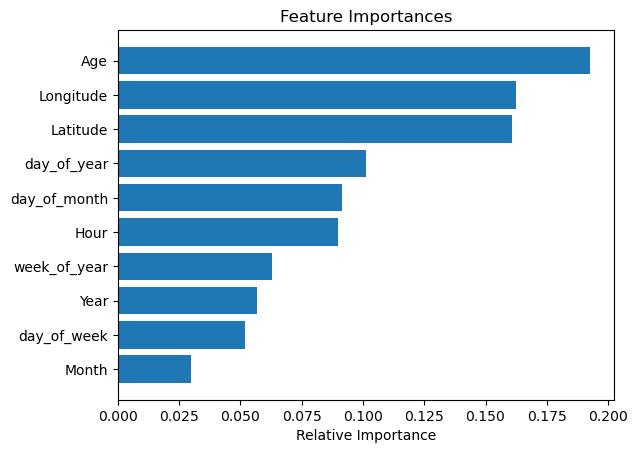

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), om[indices])
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

#### DECISION TREE CLASSIFIER

In [67]:
from sklearn import tree

In [68]:
from sklearn.tree import DecisionTreeClassifier

X = df1[['Latitude', 'Longitude', 'Year', 'Month', 'day_of_month', 'day_of_year',
       'week_of_year', 'day_of_week', 'Hour', 'Age']] # Features
y = df1[['violent_crime', 'property_crime']]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
classifier=DecisionTreeClassifier()

In [70]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [71]:
y_pred=classifier.predict(X_test)

In [72]:
accuracy_dtc = accuracy_score(y_test, y_pred)
accuracy_dtc

0.6616515700150783

In [73]:
om=classifier.feature_importances_
indices = np.argsort(om)

In [74]:
features=df1.columns

In [75]:
features

Index(['Latitude', 'Longitude', 'Year', 'Month', 'day_of_month', 'day_of_year',
       'week_of_year', 'day_of_week', 'Hour', 'Age', 'violent_crime',
       'property_crime'],
      dtype='object')

Text(0.5, 0, 'Relative Importance')

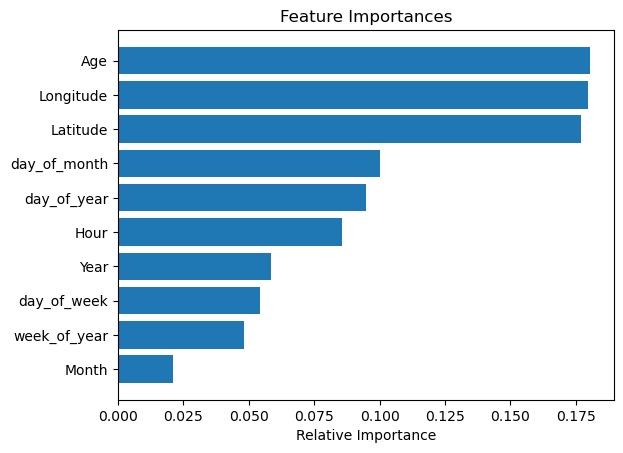

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), om[indices])
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [77]:
data = {
    "Algorithm": ['Random Forest', 'Decision Tree'],
    "Accuracy": [accuracy_rfc, accuracy_dtc]
}
acc_df = pd.DataFrame(data)
acc_df

,Algorithm,Accuracy
0,Random Forest,0.735480
1,Decision Tree,0.661652


In [78]:
import pickle
pickle_out=open("rfc.pkl","wb")
pickle.dump(rfc,pickle_out)
pickle_out.close()